In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
os.chdir(r"C:\Users\garla\first-node\WalkExplorer\neighborhood_data")
print("Current directory:", os.getcwd())

Current directory: C:\Users\garla\first-node\WalkExplorer\neighborhood_data


In [3]:
race_income_df = pd.read_csv(r'C:\Users\garla\first-node\WalkExplorer\neighborhood_data\Housing_Cost_Burden_by_Race.csv')

In [4]:
# Only include year 2022 data (most recent available)
race_income_2022 = race_income_df[race_income_df["YEAR"] == 2022]

In [5]:
print(race_income_2022.columns)

Index(['OBJECTID', 'YEAR', 'AMI', 'RACE', 'TENURE', 'AGE', 'TOTAL', 'BURDEN30',
       'BURDEN3050', 'BURDEN50', 'NODATA', 'NOBURDEN', 'PERCENT30',
       'PERCENT3050', 'PERCENT50', 'PERCENT_NODATA', 'PERCENT_NOBURDEN',
       'INCOME', 'COSTS'],
      dtype='object')


Bar Charts

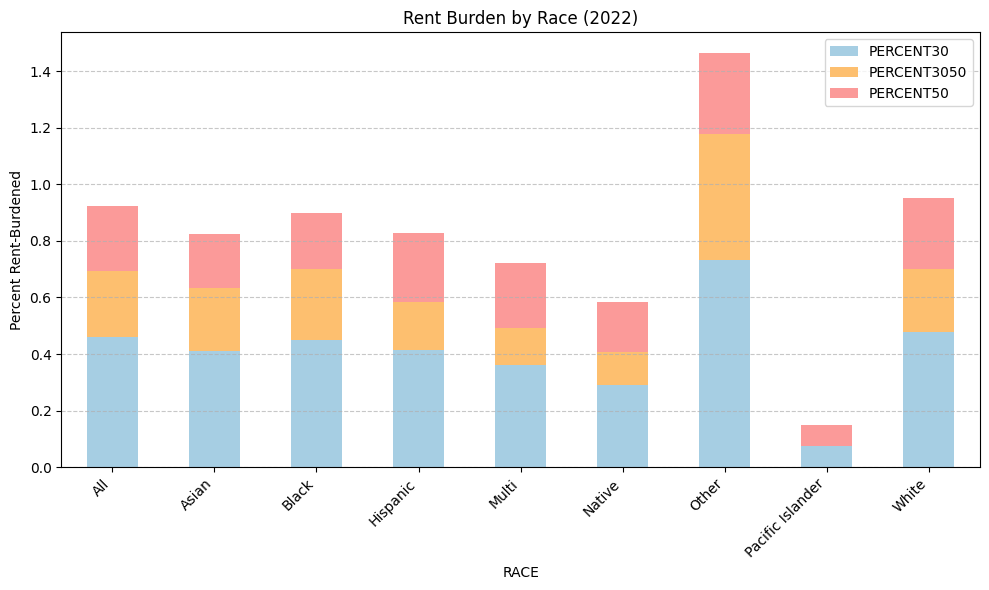

In [6]:
# Group and average rent burden percentages by race
grouped = race_income_2022.groupby("RACE")[["PERCENT30", "PERCENT3050", "PERCENT50"]].mean().reset_index()

# Plot
grouped.plot(
    x="RACE",
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["#a6cee3", "#fdbf6f", "#fb9a99"]  # Blue/Orange/Red
)

plt.ylabel("Percent Rent-Burdened")
plt.title("Rent Burden by Race (2022)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Heatmaps

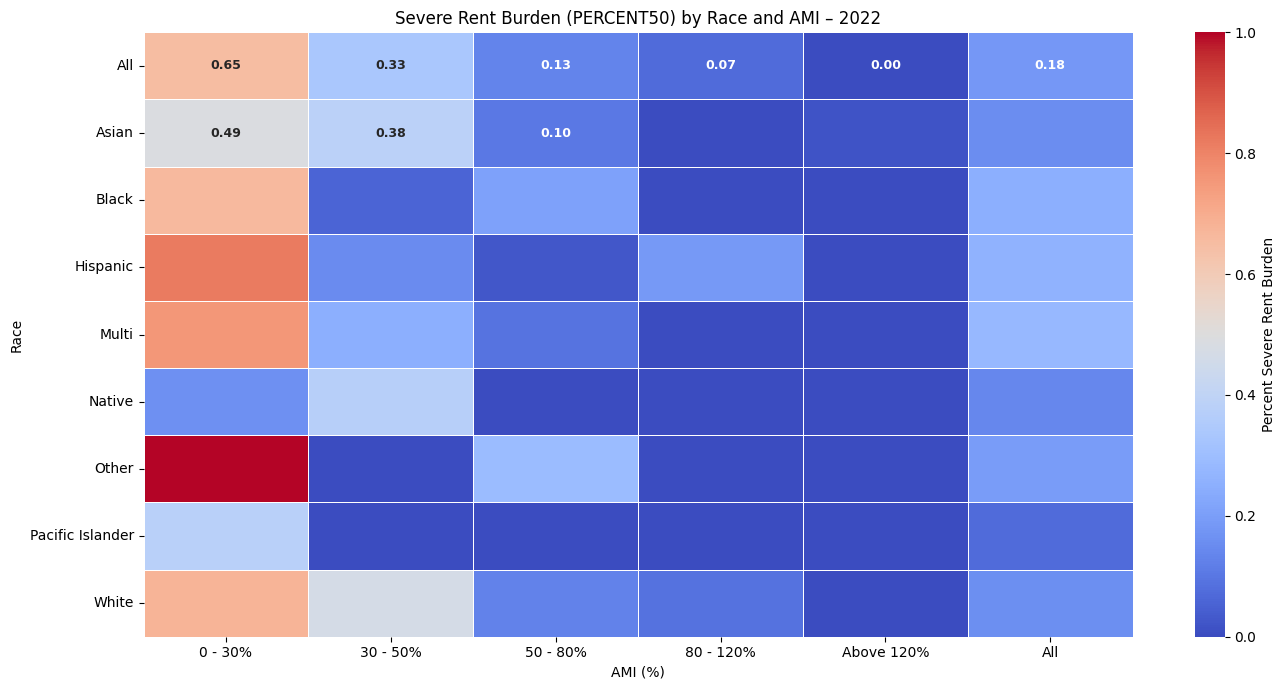

In [13]:
# Pivot table: rows = RACE, columns = AMI, values = % with severe burden
heatmap_data = race_income_2022.pivot_table(
    index="RACE",
    columns="AMI",
    values="PERCENT50",
    aggfunc="mean"
)

# Fill missing values with 0 for labeling
heatmap_data_filled = heatmap_data.fillna(0)

plt.figure(figsize=(14, 7))  # Bigger figure for clarity

sns.heatmap(
    heatmap_data_filled,
    annot=True,
    fmt=".2f",               # Show 1 decimal place
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 9, "weight": "bold"},  # Customize label font
    cbar_kws={'label': 'Percent Severe Rent Burden'}
)

plt.title("Severe Rent Burden (PERCENT50) by Race and AMI – 2022")
plt.ylabel("Race")
plt.xlabel("AMI (%)")
plt.tight_layout()
plt.show()